# Outils de test 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fixedpoint import FixedPoint

In [9]:
def generateurMandelbrot(z_re, z_im, c_re, c_im):
    z2_re = z_re**2
    z2_im = z_im**2
    r2 = z2_re + z_im

    z_re1 = z2_re - z2_im + c_re
    z_im1 = 2 * z_re*z_im + c_im

    # entre chaque calcul tronc n apres la virgule n > m

    return z_re1, z_im1, r2

def iterateur(z_re, z_im, c_re, c_im, limR=4, limIter=100):
    iteration = 0
    r2 = 0
    while((r2 < limR) and (iteration < limIter)):
        (z_re, z_im, r2) = generateurMandelbrot(z_re, z_im, c_re, c_im)
        iteration += 1
    return iteration

In [3]:
xlim = 1024
ylim = 600

figure = np.zeros((xlim,ylim))
xvec = np.linspace(-2,1,xlim)
yvec = np.linspace(-1,1,ylim)


In [4]:
for ix,x in enumerate(xvec):
    for iy,y in enumerate(yvec):
        i = iterateur(0,0,x,y,limIter=100)
        if(i==100):  
            figure[ix,iy] = 0
        else:
            figure[ix,iy] = 255


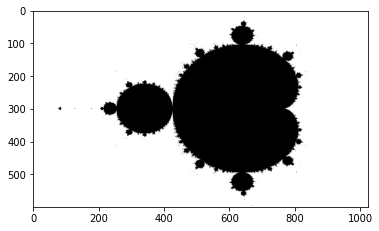

In [5]:
plt.figure()
plt.imshow(figure.T,cmap='gray')
plt.show()

In [6]:
figure

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

## Passage des fonctions en virgule fixe

In [8]:
# Paramètres importants
m = 4
n = 14

In [17]:
# def resize(x : FixedPoint):
#     print(x.qformat)
#     start =x.n-n
#     end = m + n-1
#     new = f"0b{x.bits[start:end]:0{m+n}b}"
#     print(f"[{start}:{end}] -> {new}")
#     return FixedPoint(new, m=m, n=n, signed=True, str_base=2)
def createFP(v):
    FixedPoint(v, m=m, n=n, signed=True, str_base=2)

def resize(x : FixedPoint):
    #x_str = str(x)
    x_str = f"{x.bits:0{x.m+x.n}b}"
    new = f"0b{x_str[x.m-m:x.m+n]}"
    #print(f"[{start}:{end}] -> {new}")
    return FixedPoint(new, m=m, n=n, signed=True, str_base=2)

In [26]:
def FP_generateurMandelbrot(z_re : FixedPoint, z_im : FixedPoint, c_re : FixedPoint, c_im : FixedPoint):  
    z2_re = z_re*z_re
    z2_re = resize(z2_re)

    z2_im = z_im*z_im
    z2_im = resize(z2_im)

    r2 = z2_re + z_im
    r2 = resize(r2)

    z_re1_int = z2_re - z2_im   
    z_re1_int = resize(z_re1_int)
    z_re1_int = z_re1_int + c_re
    z_re1 = resize(z_re1_int)

    z_im1_int = 2 * z_re
    z_im1_int = resize(z_im1_int)
    z_im1_int = z_im1_int*z_im
    z_im1_int = resize(z_im1_int)
    z_im1_int = z_im1_int + c_im
    z_im1 = resize(z_im1_int)
    # entre chaque calcul tronc n apres la virgule n > m

    return z_re1, z_im1, r2

def FP_iterateur(z_re, z_im, c_re, c_im, limR=4, limIter=100):
    iteration = 0
    r2 = 0
    # prepare for FixedPoint  
    z_re = createFP(z_re)
    z_im = createFP(z_im)
    c_re = createFP(c_re)
    c_im = createFP(c_im)

    while((r2 < limR) and (iteration < limIter)):
        (z_re, z_im, r2) = FP_generateurMandelbrot(z_re, z_im, c_re, c_im)
        iteration += 1
    return iteration

In [27]:
xlim = 1024
ylim = 600

figure = np.zeros((xlim,ylim))
xvec = np.linspace(-2,1,xlim)
yvec = np.linspace(-1,1,ylim)

In [28]:
f = FixedPoint(2)

In [29]:
for ix,x in enumerate(xvec):
    for iy,y in enumerate(yvec):
        i = FP_iterateur(0,0,x,y,limIter=100)
        if(i==100):  
            figure[ix,iy] = 0
        else:
            figure[ix,iy] = 255

TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'